In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('/content/AttendanceMarksSA.csv')
df.head()
df.describe()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


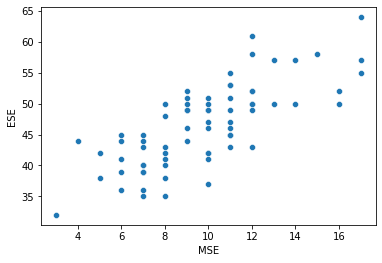

In [2]:
X= df['MSE']
Y=df['ESE']
sns.scatterplot(X,Y)

In [4]:
beta0=0
beta1=0
alpha=0.01
count =10000
n=float(len(X))

In [7]:
for i in range(count): 
    Ybar = beta1*X + beta0    
    beta1 = beta1 - (alpha/n)*sum(X*(Ybar-Y))
    beta0 = beta0 - (alpha/n)*sum(Ybar-Y)
    
print(beta0,beta1)

30.666352458860803 1.6321516393587923


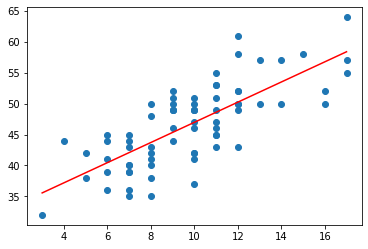

In [8]:
Ybar = beta1*X + beta0

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Ybar), max(Ybar)], color='red')  # regression line
plt.show()

In [10]:
import math
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


rse= RSE(df['ESE'],Ybar)
print(rse)

4.396224549647786


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
x = np.array(df['MSE']).reshape(-1,1)
y = np.array(df['ESE']).reshape(-1,1)
 

lr = LinearRegression()
lr.fit(x,y)


print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(x)
rse = RSE(y,yp)

print(rse)


[[1.63215164]]
[30.66635246]
4.396224549647786
